In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import recall_score,r2_score


%matplotlib inline
plt.style.use('seaborn')

C:\Users\elvis\AppData\Local\Temp\ipykernel_20812\3657033514.py:22: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Viewing the test & train Data

In [2]:
data_train = pd.read_csv('Data/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test = pd.read_csv('Data/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exploring the Data

In [4]:
print('Shape of the data is:',data_train.shape)

Shape of the data is: (891, 12)


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Age','Cabin' and 'Embarked' have null values. Imputing is needed. 'Sex' & 'Embarked' need to be encoded.

EDA

How many Survived?

In [8]:
#combining the train and test datasets
frames = [data_train,data_test]
data = pd.concat(frames)

In [9]:
print('Train dataset Shape:',data_train.shape)

Train dataset Shape: (891, 12)


In [10]:
print('Test dataset Shape:',data_test.shape)

Test dataset Shape: (418, 11)


In [11]:
print('Entire dataset Shape:',data.shape)

Entire dataset Shape: (1309, 12)


In [12]:
data['Survived'].value_counts() 

0.0    549
1.0    342
Name: Survived, dtype: int64

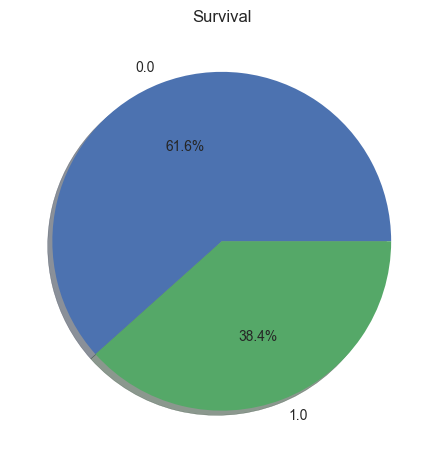

In [13]:
data['Survived'].value_counts().plot.pie(title='Survival',autopct='%1.1f%%',ylabel='',shadow=True)
plt.show()

Distribution of 'Survived' based on 'Age'

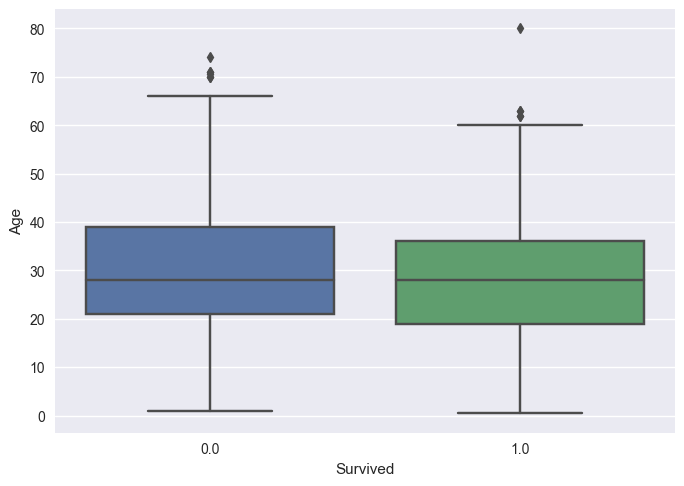

In [14]:
sns.set_style('darkgrid')
ax = sns.boxplot(x='Survived',y='Age',data=data)

Distribution of Passenger Class'Pclass' based on 'Age'

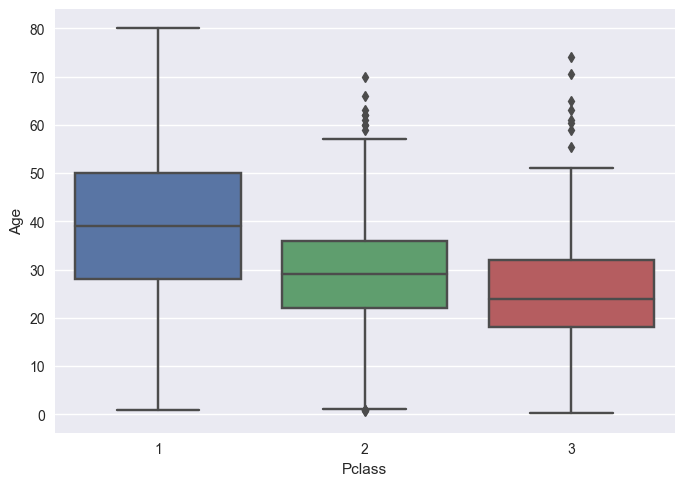

In [15]:
sns.set_style('darkgrid')
ax= sns.boxplot(x='Pclass',y='Age',data=data)
#ax = sns.stripplot(x="Pclass", y="Age",data=data)

Distribution of No of Parents/Children'Parch' based on 'Age'

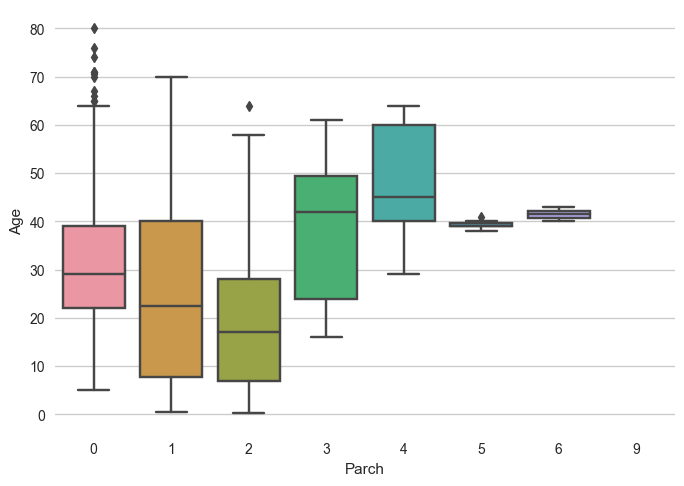

In [16]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='Parch',y='Age',data=data)
#ax = sns.stripplot(x="Parch", y="Age",data=data)

Survival by Sex

In [17]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival by Sex')

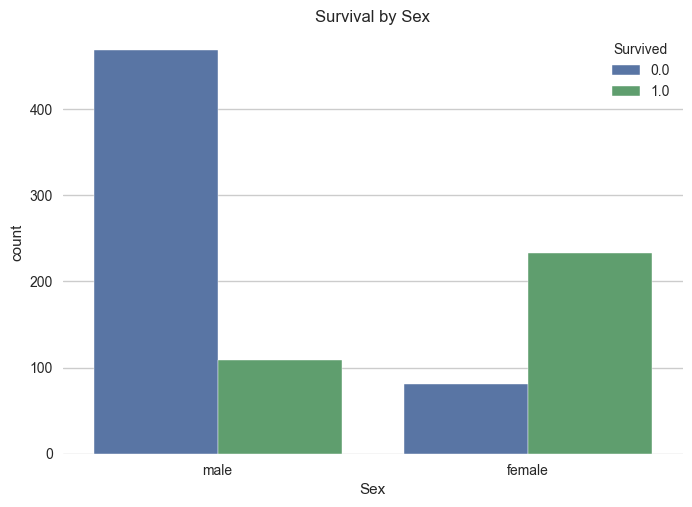

In [18]:
sns.countplot(data=data,x='Sex',hue='Survived').set_title('Survival by Sex')

Among the female gender, there were more survivors but it is also important to note that the female passengers were considerably less than their male counterparts.

Survival By Boarding Class

In [19]:
#coming up with a pandas crosstab for visualization
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient()

Survived,0.000000,1.000000,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Imputing

In [20]:
data_train['Embarked'] = data_train['Embarked'].fillna(data_train['Embarked'].mode()[0])
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].mean())

data_test['Embarked'] = data_test['Embarked'].fillna(data_test['Embarked'].mode())
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())

Label Encoding

In [21]:
data_train['Sex'].replace(['male','female'],[0,1],inplace=True)
data_train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

data_test['Sex'].replace(['male','female'],[0,1],inplace=True)
data_test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

Dropping non-informative columns

In [22]:
data_train.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
data_test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [23]:
data_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [24]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


Checking for nulls

In [25]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Correlation between the columns

<AxesSubplot: >

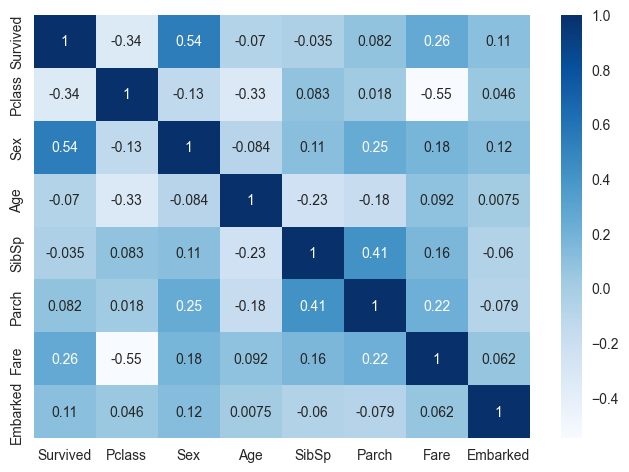

In [26]:
sns.heatmap(data_train.corr(),annot=True,cmap='Blues')

## Model Building

Defining x & y

In [27]:
x = data_train.drop(['Survived'],axis=1)
y = data_train['Survived']

Normalization

In [28]:
scaler = preprocessing.StandardScaler()
Xs = scaler.fit_transform(x)
Xs

array([[ 0.82737724, -0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517, -0.56883712],
       [-1.56610693,  1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529,  1.00518113],
       [ 0.82737724,  1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426, -0.56883712],
       ...,
       [ 0.82737724,  1.35557354,  0.        , ...,  2.00893337,
        -0.17626324, -0.56883712],
       [-1.56610693, -0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104,  1.00518113],
       [ 0.82737724, -0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783,  2.57919938]])

In [29]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(Xs,y,test_size=0.3,random_state=1,stratify=y)

Hyperparameter Optimization for Models

In [30]:
def grid_search(model,params, random):
    cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

    if random:
        grid_cv = RandomizedSearchCV(model,params,scoring='accuracy',cv=cv,n_jobs=-1,random_state=1)
    else:
        grid_cv = GridSearchCV(model,params,scoring='accuracy',cv=cv,n_jobs=-1)
    grid_cv.fit(x_train,y_train)

    best_params = grid_cv.best_params_
    best_score = grid_cv.best_score_

    print('Best Parameters:',best_params)
    print('Best Score:',best_score.round(4))        

Hyperparameter Optimization for KNN

In [31]:
#marginally best(n_neighbors)
model = KNeighborsClassifier()
params = {'n_neighbors':range(1,50)}
grid_search(model,params,random=False)


Best Parameters: {'n_neighbors': 27}
Best Score: 0.8075


In [32]:
#marginally best(weight)
model = KNeighborsClassifier()
params = {'weights':['uniform','distance']}
grid_search(model=model,params=params,random=False)

Best Parameters: {'weights': 'uniform'}
Best Score: 0.8059


In [33]:
#marginally best(p)
model = KNeighborsClassifier()
params = {'p':[1,2,3,4]}
grid_search(model=model,params=params,random=False)

Best Parameters: {'p': 2}
Best Score: 0.8059


In [34]:
#jointly best
model = KNeighborsClassifier()
params = {'n_neighbors':[19,20,21,22,23,24,25,26,27,28,29,30],'p':[1,2,3]}
grid_search(model,params=params,random=True)

Best Parameters: {'p': 1, 'n_neighbors': 20}
Best Score: 0.8123


Hyperparameter Optimization for Logistic Regression

In [35]:
#penalty type
model= LogisticRegression(random_state=1)
params={'penalty':['l1','l2','none','elasticnet']}
grid_search(model=model,params=params,random=False)

Best Parameters: {'penalty': 'none'}
Best Score: 0.8074


c:\Users\elvis\OneDrive\Documents\python_projects_git_repo\Titanic\titanic\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elvis\OneDrive\Documents\python_projects_git_repo\Titanic\titanic\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elvis\OneDrive\Documents\python_projects_git_repo\Titanic\titanic\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, se

In [36]:
#C:L1 penalty
model= LogisticRegression(random_state=1)
grid_search(model, params={'penalty':['l1'],'solver':['saga'],'C':[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 10, 100, 1000]}, random=False)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.8074


In [37]:
#C: L2 penalty
model= LogisticRegression(random_state=1)
grid_search(model, params={'penalty':['l2'],'C':[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 10, 100, 1000]}, random=False)

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Score: 0.8075


In [38]:
#jointly best
model= LogisticRegression(random_state=1)
grid_search(model, params={'penalty':['elasticnet'],'solver':['saga'],'l1_ratio':[0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9],'C':[0.0001, 0.001, 0.01, 0.1, 0.3,0.4, 0.5, 0.7, 1]}, random=True)

Best Parameters: {'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': 0.9, 'C': 0.5}
Best Score: 0.8058


Hyperparameter Optimization for SVM

In [39]:
#kernel
model=SVC(random_state=1)
params={'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid_search(model=model,params=params, random=False)

Best Parameters: {'kernel': 'rbf'}
Best Score: 0.8187


In [40]:
#penalty
model=SVC(random_state=1)
grid_search(model = model, params={'C':[0.1,0.3,0.5, 0.7, 0.8, 0.9,1, 1.5, 3, 5, 10, 100]}, random=False)

Best Parameters: {'C': 0.5}
Best Score: 0.8235


In [41]:
#check for kernel SVM : polynomial degree
grid_search(model = model, params={'kernel':['poly'], 'degree':[0,1,2,3,4,5,6,7,8,9]},random=False)

Best Parameters: {'degree': 3, 'kernel': 'poly'}
Best Score: 0.8154


In [42]:
#check for kernel SVM : polynomial gamma
grid_search(model = model, params={'kernel':['poly'], 'degree':[1],'gamma':[0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10]}, random=False)

Best Parameters: {'degree': 1, 'gamma': 0.5, 'kernel': 'poly'}
Best Score: 0.7882


In [43]:
#check for kernel SVM : rbf gamma
grid_search(model = model, params={'kernel':['rbf'],'gamma':[0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10]}, random=False)

Best Parameters: {'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.8236


In [44]:
grid_search(model = model, params={'kernel':['sigmoid'],'gamma':[0.01,0.05,0.1,0.3,0.4,0.5,0.6,0.7,1,2]}, random=False)

Best Parameters: {'gamma': 0.01, 'kernel': 'sigmoid'}
Best Score: 0.7802


In [45]:
#jointly best for polynomial
grid_search(model = model, params={'kernel':['poly'],'degree':[0,1,2],'gamma':[0.01,0.05,0.1,0.3,0.4,0.5,0.6,0.7,1,2],'C':[0.1,0.3,0.4,0.5, 0.6,0.7, 0.8, 0.9,1]},random=True)

Best Parameters: {'kernel': 'poly', 'gamma': 1, 'degree': 2, 'C': 0.3}
Best Score: 0.8107


In [46]:
#jointly best
grid_search(model = model, params={'kernel':['linear','sigmoid'],'gamma':[0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,5,10],
                        'C':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]},random=True)

Best Parameters: {'kernel': 'sigmoid', 'gamma': 0.005, 'C': 13}
Best Score: 0.785


In [47]:
#check for kernel SVM : rbf gamma
grid_search(model = model, params={'kernel':['rbf'],'gamma':[0.05,0.1,0.15,0.2,0.3,0.5,1,2,3,5,10]}, random=True)

Best Parameters: {'kernel': 'rbf', 'gamma': 0.1}
Best Score: 0.8236


Model Fitting with Optimized Hyperparameters

In [48]:
knn = KNeighborsClassifier(n_neighbors=27,p=2)
knn.fit(x_train,y_train)
#cross_validate(knn,Xs,y)

y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

print('Training accracy: ', accuracy_score(y_train,y_train_pred))
print('Test accracy: ', accuracy_score(y_test,y_test_pred))

Training accracy:  0.8250401284109149
Test accracy:  0.8171641791044776


In [49]:
lr=LogisticRegression(random_state=1,penalty= 'elasticnet',C=0.5,l1_ratio = 0.9,solver='saga')
lr.fit(x_train,y_train)
#cross_val(lr, X_std, y, num_splits=10)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print('Training accuracy_score: ', accuracy_score(y_train,y_train_pred))
print('Test accuracy_score: ', accuracy_score(y_test,y_test_pred))

Training accuracy_score:  0.8105939004815409
Test accuracy_score:  0.7798507462686567


In [50]:
svc=SVC(random_state=1,kernel='rbf', gamma=0.1)
svc.fit(x_train,y_train)
#cross_val(svc, X_std, y, num_splits=10)

y_train_pred=svc.predict(x_train)
y_test_pred=svc.predict(x_test)

print('Training accuracy_score: ', accuracy_score(y_train,y_train_pred))
print('Test accuracy_score: ', accuracy_score(y_test,y_test_pred))

Training accuracy_score:  0.8426966292134831
Test accuracy_score:  0.8134328358208955


In [51]:
lda=LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(x_train,y_train)
#cross_val(lda, X_std, y, num_splits=10)
y_train_pred=lda.predict(x_train)
y_test_pred=lda.predict(x_test)

print('Training accuracy_score: ', accuracy_score(y_train,y_train_pred))
print('Test accuracy_score: ', accuracy_score(y_test,y_test_pred))

Training accuracy_score:  0.8041733547351525
Test accuracy_score:  0.7873134328358209


In [52]:
qda=QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(x_train,y_train)
#cross_val(qda, X_std, y, num_splits=10)
y_train_pred=qda.predict(x_train)
y_test_pred=qda.predict(x_test)

print('Training accuracy_score: ', accuracy_score(y_train,y_train_pred))
print('Test accuracy_score: ', accuracy_score(y_test,y_test_pred))

Training accuracy_score:  0.8089887640449438
Test accuracy_score:  0.8097014925373134


In [53]:
gnb=GaussianNB()
gnb.fit(x_train, y_train)
#cross_val(gnb, X_std, y, num_splits=10)
y_train_pred=gnb.predict(x_train)
y_test_pred=gnb.predict(x_test)

print('Training accuracy_score: ', accuracy_score(y_train,y_train_pred))
print('Test accuracy_score: ', accuracy_score(y_test,y_test_pred))

Training accuracy_score:  0.7784911717495987
Test accuracy_score:  0.7947761194029851


In [56]:
xyz=[];accuracy=[];std=[]
classifiers=['knn','lr','svc','lda','qda','gnb']
models=[knn,lr,svc,lda,qda,gnb]
for i in models:
    model = i
    cv_result = cross_val_score(model, Xs, y, cv=10, scoring="accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
knn,0.813708,0.032927
lr,0.794632,0.022859
svc,0.827166,0.034488
lda,0.791223,0.024368
qda,0.804707,0.033441
gnb,0.786767,0.014906
